# 数据结构的定义

数据结构是指相互之间存在着一种或多种关系的数据元素的集合和该集合中数据元素之间的关系组成。

简单来说，数据结构就是设计数据以何种方式组织并存储在计算机中。比如在C语言中数组直接用连续的空间进行存储，python中列表连续的空间存储的是数据真实的地址。

比如：列表、集合与字典等都是一种数据结构。

# 数据结构的分类

数据结构按照其逻辑结构可分为线性结构、树结构、图结构。
* 线性结构：数据结构中的元素存在一对一的相互关系
* 树结构：数据结构中的元素存在一对多的相互关系
* 图结构：数据结构中的元素存在多对多的相互关系

# 列表

列表：在其他编程语言中称为“数组”，是一种基本的数据结构类型。

关于列表的问题：
* 列表中元素使如何存储的？
* 列表提供了哪些基本的操作？
* 这些操作的时间复杂度是多少？

在其他编程语言中，数组就是连续的一段地址空间，里面存储的就是data数据。但是python不同，因为python的列表里可以存放不同的数据类型，不像别的语言的数组的类型必须是一致的，所以python的列表里其实存放的是真实数据的指针(这样做的缺点就是浪费内存了)。一般当列表的大小不够的时候，会重新申请一段内存，大小是原来的2倍，然后把数据拷贝过去。append的操作时间复杂度是O(1): 考虑到重新申请内存扩充的情况是比较少的，相比较append操作的次数这种扩充平摊下来可以忽略不计。另外，对列表的取值操作时间复杂度也是O(1): a[5], 用的是`a的地址+5*4(地址占4个字节)`, 一次乘法操作和一次
加法操作，值得说明的是操作系统根据内存地址寻找到这个地址是O(1)的操作。内存可以看做是一个个小格子，每个格子是一个字节，32位系统的cpu的寻址能力是`2**32`, 也就是说cpu可以查找的格子的最大编号是`2**32-1`，这也是为啥32位的系统用不了8G内存。

# 栈

栈(Stack)是一个数据集合，可以理解为只能在一端进行插入或删除操作的列表(可以形象地看做是一个杯子)。
栈的特点：后进先出(last-in, first-out).

栈的概念：栈顶；栈底

栈的基本操作：
* 进栈（压栈）：push
* 出栈：pop
* 取栈顶：gettop

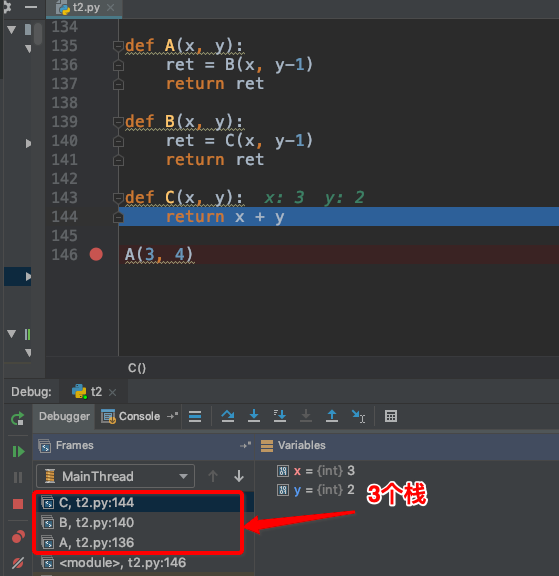

栈功能的python实现(仅仅是实现栈的功能效果)
* 不需要自己定义，使用列表结构即可。
* 进栈函数：append
* 出栈函数：pop
* 查看栈顶函数：li[-1]

栈的应用——括号匹配问题!
括号匹配问题：给一个字符串，其中包含小括号、中括号、大括号，求该字符串中的括号是否匹配。
例如：
* `()()[]{}`		匹配
* `([{()}])`		匹配
* `[](`		不匹配
* `[(])`		不匹配


In [3]:
def bracket(s):

    dic = {"]": "[", "}": "{", ")": "("}
    lis = []
    # 3种不匹配的情况 [ [{] [}
    for char in s:
        if char in dic.values():
            lis.append(char)
        elif len(lis) == 0:
            return False
        elif dic[char] == lis[-1]:
            lis.pop()
        else:
            return False
    if len(lis) > 0:
        return False
    else:
        return True
print(bracket('()()[{}'))

False


# 队列

队列(Queue)是一个数据集合，仅允许在列表的一端进行插入，另一端进行删除。
* 进行插入的一端称为队尾(rear), 插入动作称为进队或入队
* 进行删除的一端称为队头(front), 删除动作称为出队
* 队列的性质：先进先出(First-in, First-out)

双向队列：队列的两端都允许进行进队和出队操作

## 队列的实现思路

实现队列的功能，我们首先想到的是用列表。用列表没问题，考虑出队列的情况，如果某个数据pop出去，那么所有其他的数据都得往前移动，这种方式复杂度太高了。所以：初步设想是用列表+两个下标指针：
* 创建一个列表和两个变量，front变量指向队首，rear变量指向队尾。初始时，front和rear都为0。
* 进队操作：元素写到li[rear]的位置，rear自增1。
* 出队操作：返回li[front]的元素，front自减1。
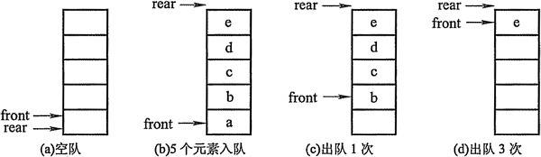
但是这样同样会有问题，比如出队列的情况，此时front上移，但是之前的几个元素的位置就空下来了，而且还不能释放，因为需要这几个位置占位来记录front和rear的索引。

## 队列的实现原理—环形队列



在上图我们发现在队列满的时候，环形队列有一个位置是空的，这个位置被浪费了。如果这个位置还存值的话，那么rear和front就重合到一起了，这就和初始空队列一样了。
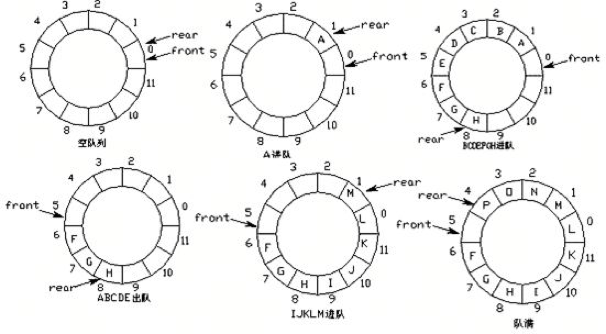
环形队列：当队尾指针front == Maxsize + 1时，再前进一个位置就自动到0。

实现方式：求余数运算

* 队首指针前进1：front = (front + 1) % MaxSize
* 队尾指针前进1：rear = (rear + 1) % MaxSize
* 队空条件：rear == front
* 队满条件：(rear + 1) % MaxSize == front

## python内置的队列模块

使用方法：from collections import deque

创建队列：queue = deque(li)

1. 进队：append
2. 出队：popleft
3. 双向队列队首进队：appendleft
4. 双向队列队尾进队：pop

单向队列1和2的操作就能满足。

# 链表

链表中每一个元素都是一个对象，每个对象称为一个节点，包含有数据域key和指向下一个节点的指针next。通过各个节点之间的相互连接，最终串联成一个链表。


In [4]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

node对象有2个属性：data和next，data存放的就是真实的数据，next存放的是下一个node对象的地址。self.next = node，因为node不是一个单纯的数字，所以next域存放的就是一个地址，可以先简单地这么理解。

对于一个链表，有头指针的概念。对于头指针的表示方式，大体有2种：空链表时head=None或者head是一个next域指向None的节点。个人倾向第二种，因为这样的方式，head的data域可以存放链表的长度等信息，不需要遍历链表去计算长度了。

In [1]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None


class LinkedList:
    def __init__(self, li, method="head"):
        self.head = Node(data=0)
        if method == "head":
            self.head_insert(li)
        elif method == "tail":
            self.tail_insert(li)
        else:
            raise ValueError("Unsupport method %s" % method)

    def head_insert(self, li):
        # 头插法, 在头部插入
        for data in li:
            node = Node(data=data)
            node.next = self.head.next
            self.head.next = node
            self.head.data += 1

    def tail_insert(self, li):
        tail = self.head
        for data in li:
            node = Node(data=data)
            tail.next = node
            tail = node
            self.head.data += 1

    def traverse(self):
        p = self.head.next
        while p:
            yield p.data
            p = p.next


ll = LinkedList(li= [1,2,3,4,5], method="tail")
for i in ll.traverse():
    print(i)

1
2
3
4
5


遍历链表
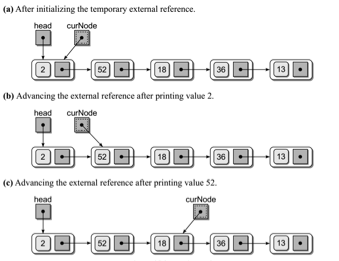

链表节点的插入和删除

插入：
```
p.next = curNode.next
curNode.next = p
```
删除：
```
p = curNode.next
curNode.next = curNode.next.next
del p
```
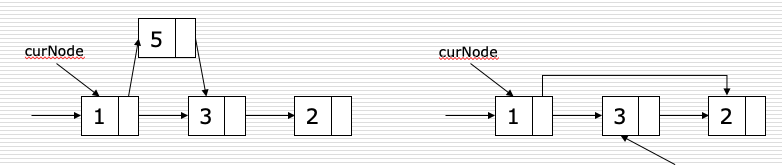

## 双链表

双链表中每个节点有两个指针：一个指向后面节点、一个指向前面节点。


In [2]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None
        self.prior = None

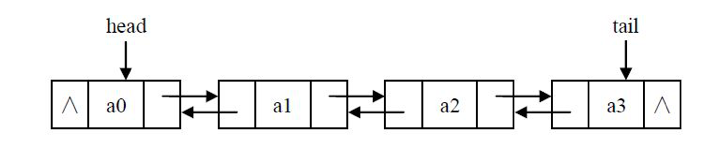

### 双链表节点的插入和删除

插入：
```
p.next = curNode.next
curNode.next.prior = p
p.prior = curNode
curNode.next = p
```
删除：
```
p = curNode.next
curNode.next = p.next
p.next.prior = curNode
del p
```
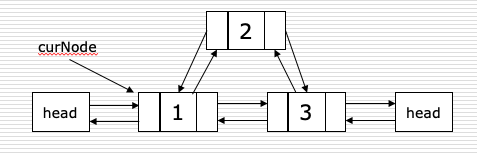

针对链表的操作，首先要保持链表别断; 其次需要借助指针的移动去操作链表(例如tail=self.head, 因为tail=对象，不是单纯的数字，所以这里看做指针); 另外，链表的操作使用whlie循环居多，因为不确定要循环多少次。

* 链表在插入和删除的操作上明显快于顺序表
* 链表的内存可以更灵活的分配
* 链表这种链式存储的数据结构对树和图的结构有很大的启发性

其实硬盘上的文件存储例如FAT32采用的就是链式存储，硬盘的每一个block是4K, 很多block串联在一起组成了一个文件。

另外，值得说明的是，链表的插入和删除也指明了要插入的位置和删除的位置，只需要移动一下指针就ok，这里不考虑寻找插入和删除的位置。对列表的插入和删除，时间复杂度主要是插入和删除后元素的整体移动。

# 哈希表

哈希表一个通过哈希函数来计算数据存储位置的数据结构，通常支持如下操作：
* insert(key, value)：插入键值对(key,value)
* get(key)：如果存在键为key的键值对则返回其value，否则返回空值
* delete(key)：删除键为key的键值对

细心地话我们可以发现，上面的3种操作就是python字典"得意"的3种操作。

## 直接寻址表

当关键字的全域U比较小时，直接寻址是一种简单而有效的方法。
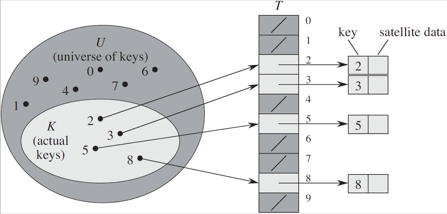

直接寻址技术缺点：
* 当域U很大时，需要消耗大量内存，很不实际
* 如果域U很大而实际出现的key很少，则大量空间被浪费
* 无法处理关键字不是数字的情况

直接寻址表：key为k的元素放到k位置上.

直接寻址表说明：当字典的关键字的全域U比较小(例如就是0到9)，那么我们创建一个列表，索引是0到9，每个空间存的树就是关键字对应的value.

## 改进直接寻址表：哈希（Hashing）
构建大小为m的寻址表T, key为k的元素放到h(k)位置上, h(k)是一个函数，其将域U映射到表T[0,1,...,m-1].

哈希表（Hash Table，又称为散列表），是一种线性表的存储结构。哈希表由一个直接寻址表和一个哈希函数组成。哈希函数h(k)将元素关键字k作为自变量，返回元素的存储下标。

简单哈希函数：
除法哈希：h(k) = k mod m
乘法哈希：h(k) = floor(m(kA mod 1))   0<A<1

假设有一个长度为7的数组，哈希函数h(k)=k mod 7。元素集合{14,22,3,5}的存储方式如下图。

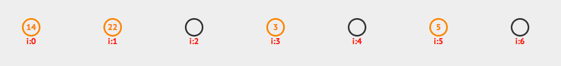

由于哈希表的大小是有限的，而要存储的值的总数量是无限的，因此对于任何哈希函数，都会出现两个不同元素映射到同一个位置上的情况，这种情况叫做哈希冲突。

比如：h(k)=k mod 7, h(0)=h(7)=h(14)=...

## 解决哈希冲突

### 开放寻址法

开放寻址法：如果哈希函数返回的位置已经有值，则可以向后探查新的位置来存储这个值。
* 线性探查：如果位置i被占用，则探查i+1, i+2,……
* 二次探查：如果位置i被占用，则探查i+12,i-12,i+22,i-22,……
* 二度哈希：有n个哈希函数，当使用第1个哈希函数h1发生冲突时，则尝试使用h2,h3,……

对于线性探查，数据是可以放进去了，那么查看元素在不在表里怎么办？根据hash函数得到位置，发现这个位置没有数，说明value不在表里。但是如果发现这个位置有数，那么不能说明这个value就在表里，需要往后找并进行值的匹配，匹配到则说明value存在表里，如果一直匹配直到空位置，那么说明value不在表里。

这里有一个名词叫做装载因子，n/m. 当n/m<0.5时，说明空位还是挺多的，不断地去调整装载因子实现hash表的动态扩张。

### 拉链法

拉链法：哈希表每个位置都连接一个链表，当冲突发生时，冲突的元素将被加到该位置链表的最后。
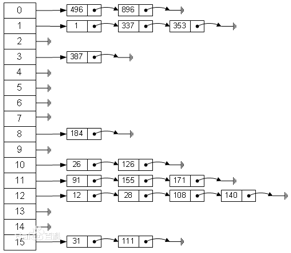
拉链法使用链表而不是列表，是因为有删除和插入，链表针对这2种操作的时间复杂度都是O(1).

# 二叉树

二叉树的链式存储：将二叉树的节点定义为一个对象，节点之间通过类似链表的链接方式来连接。

二叉树的遍历：
* 前序遍历：EACBDGF
* 中序遍历：ABCDEGF
* 后序遍历：BDCAFGE
* 层次遍历：EAGCFBD

前序、中序和后序都属于深度优先，深度优先用栈或递归，层次遍历属于广度优先，广度优先只能队列。

给定前序和中序或后序和中序，可以画出树的完整模样：前/后序找根，中序找左右子树

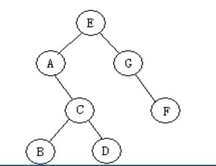

In [3]:
class BiTreeNode:
    def __init__(self, data=None):
        self.data = data
        self.lchild = None
        self.rchild = None

In [4]:
from collections import deque

class BiTreeNode:
    def __init__(self, data):
        self.data = data
        self.lchild = None
        self.rchild = None


a = BiTreeNode('A')
b = BiTreeNode('B')
c = BiTreeNode('C')
d = BiTreeNode('D')
e = BiTreeNode('E')
f = BiTreeNode('F')
g = BiTreeNode('G')

e.lchild = a
e.rchild = g
a.rchild = c
c.lchild = b
c.rchild = d
g.rchild = f

root = e

def pre_order(root):
    if root:
        print(root.data, end='')
        pre_order(root.lchild)
        pre_order(root.rchild)


def in_order(root):
    if root:
        in_order(root.lchild)
        print(root.data, end='')
        in_order(root.rchild)


def post_order(root):
    if root:
        post_order(root.lchild)
        post_order(root.rchild)
        print(root.data, end='')


def level_order(root):
    q = deque()
    q.append(root)
    while(len(q)>0): # 当队不空时循环
        x = q.popleft()
        print(x.data, end='')
        if x.lchild:
            q.append(x.lchild)
        if x.rchild:
            q.append(x.rchild)


level_order(root)

EAGCFBD

## 二叉搜索树

二叉搜索树是一颗二叉树且满足性质：设x是二叉树的一个节点。如果y是x左子树的一个节点，那么y.key ≤ x.key；如果y是x右子树的一个节点，那么y.key ≥ x.key.

* 二叉搜索树的创建
* 二叉搜索树的遍历（中序序列, 中序遍历得到的是有序的列表）
* 二叉搜索树的查询、插入、删除
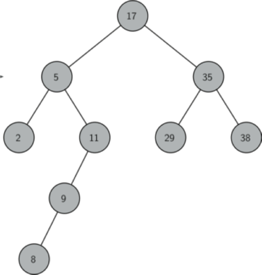

In [5]:
class BiTreeNode:
    def __init__(self, data):
        self.data = data
        self.lchild = None
        self.rchild = None


class BST:
    def __init__(self, li):
        self.root = None
        if li:
            for val in li:
                self.insert(val)

    def insert(self, key):
        if not self.root:
            # 二叉树是类似链表的形式组织起来的, 链表需要头指针，二叉树需要root根节点
            self.root = BiTreeNode(key)
        else:
            # 链表需要指针去操作，二叉搜索树也是用指针去操作
            p = self.root
            while p:
                if key < p.data:    # key要存储在左子树
                    if p.lchild:    # 如果左子树有节点,往左子树走,继续看
                        p = p.lchild
                    else:   # 如果左子树是空,就插入到左孩子的位置
                        p.lchild = BiTreeNode(key)
                        break
                elif key > p.data:
                    if p.rchild:
                        p = p.rchild
                    else:
                        p.rchild = BiTreeNode(key)
                        break
                else:
                    break

    def query(self, key):
        p = self.root
        while p:
            if key < p.data:
                p = p.lchild
            elif key > p.data:
                p = p.rchild
            else:
                return True
        return False

    def traverse(self):
        def in_order(root):
            if root:
                in_order(root.lchild)
                print(root.data, end=',')
                in_order(root.rchild)
        in_order(self.root)


tree = BST([5,4,8,7,1,9,2,3])
print(tree.query(6))

False


### 二叉搜索树—删除操作

如果要删除的节点是叶子节点：直接删除。
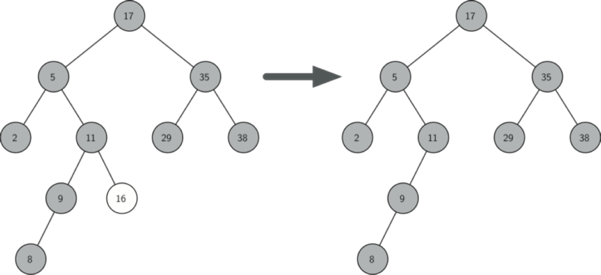

如果要删除的节点只有一个孩子：将此节点的父亲与孩子连接(直接通过指针操作)，然后删除该节点。
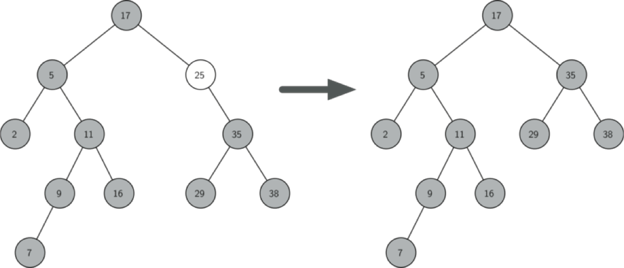

如果要删除的节点有两个孩子：将其右子树的最小节点（该节点最多有一个右孩子）删除，并替换当前节点。
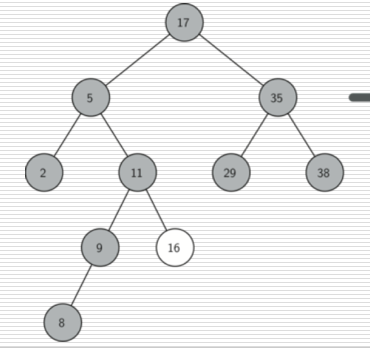
如上图，想要把节点5删除，则寻找右子树的最小数(一直找最右边，这样寻找的树一定比5左边的树上的数大，比5右边的树的数小)，找到之后替换要删除的节点，替换完成之后再删除该节点。

### 二叉搜索树的效率

平均情况下，二叉搜索树进行搜索的时间复杂度为O(nlogn)。

最坏情况下，二叉搜索树可能非常偏斜。




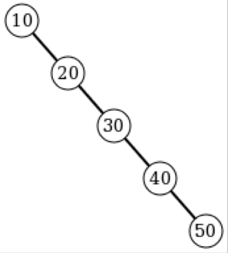

解决方案：
* 随机化插入
* AVL树

随机化插入是把要插入的数打乱，但是如果数是一个个过来让我们来构建树的话这种情况就不适用了，这时候可以考虑使用AVL树。

#### AVL树：AVL树是一棵自平衡的二叉搜索树。
AVL树具有以下性质：
* 根的左右子树的高度之差的绝对值不能超过1
* 根的左右子树都是平衡二叉树

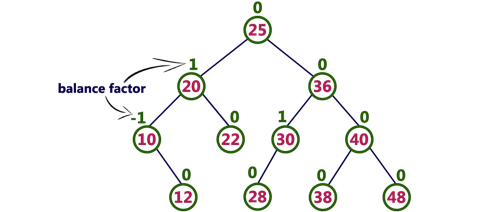

AVL树有一个概念叫平衡因子，指的是该节点的左树的高度-右树的高度。

##### AVL树—插入操作

* 插入一个节点可能会破坏AVL树的平衡，可以通过旋转操作来进行修正。
* 插入一个节点后，<font color="red">只有从插入节点到根节点的路径上的节点的平衡可能被改变。</font>我们需要找出第一个破坏了平衡条件的节点，称之为K。K的两颗子树的高度差2。

不平衡的出现可能有4种情况

1. 不平衡是由于对K的右孩子的右子树插入导致的：左旋


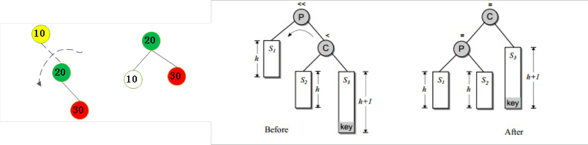

2. 不平衡是由于对K的左孩子的左子树插入导致的：右旋
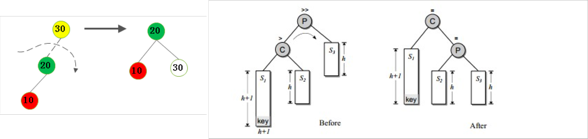

3. 不平衡是由于对K的右孩子的左子树插入导致的：右旋-左旋
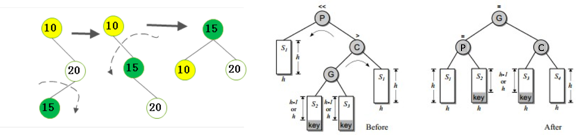

4. 不平衡是由于对K的左孩子的右子树插入导致的：左旋-右旋
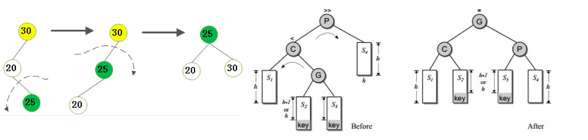

B树(B-Tree)：B树是一棵自平衡的多路搜索树(多路指的是有多个指针，二叉树只有2个指针)。常用于数据库的索引。
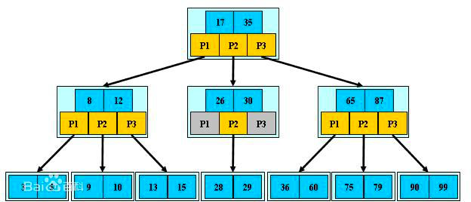

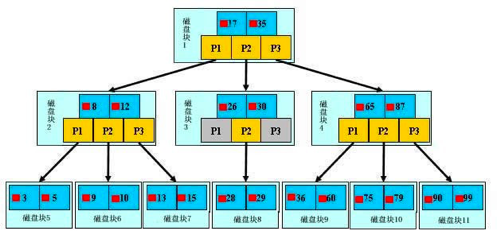